In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score,mean_absolute_percentage_error,explained_variance_score, max_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('Preprocessed_Strength.csv')

In [3]:
df.shape

(1030, 10)

In [4]:
df.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength,Age
0,0,540.0,135.7,121.4,162.0,2.5,1040.0,676.0,79.99,4.017866
1,1,540.0,135.7,121.4,162.0,2.5,1055.0,676.0,61.89,4.017866
2,2,332.5,142.5,121.4,228.0,9.4,932.0,594.0,40.27,7.197515
3,3,332.5,142.5,121.4,228.0,9.4,932.0,594.0,41.05,7.197515
4,4,198.6,132.4,121.4,192.0,9.4,978.4,825.5,44.30,7.197515


In [5]:
y = df['Strength']
X = df.drop(columns=['Unnamed: 0','Strength'], axis=1)

In [6]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,135.7,121.4,162.0,2.5,1040.0,676.0,4.017866
1,540.0,135.7,121.4,162.0,2.5,1055.0,676.0,4.017866
2,332.5,142.5,121.4,228.0,9.4,932.0,594.0,7.197515
3,332.5,142.5,121.4,228.0,9.4,932.0,594.0,7.197515
4,198.6,132.4,121.4,192.0,9.4,978.4,825.5,7.197515
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4.017866
1026,322.2,135.7,115.6,196.0,10.4,817.9,813.4,4.017866
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4.017866
1028,159.1,186.7,121.4,175.6,11.3,989.6,788.9,4.017866


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((721, 8), (309, 8), (721,), (309,))

## Pipeline Creation:

In [10]:
pipeline_LinReg = Pipeline([('scalar1',StandardScaler()),
                            ('linear_regressor',LinearRegression())]) 

pipeline_DetReg = Pipeline([('scalar2',StandardScaler()),
                            ('decisiont_regressor', DecisionTreeRegressor())])

pipeline_SvrReg = Pipeline([('scalar3',StandardScaler()),
                            ('supportvmc_regressor',LinearSVR())])

pipeline_SgdReg = Pipeline([('scalar4',StandardScaler()),
                           ('Sgd_regressor',SGDRegressor())])

pipeline_RfReg = Pipeline([('scalar5',StandardScaler()),
                           ('rf_regressor',RandomForestRegressor())])


pipelines = [pipeline_LinReg, pipeline_DetReg, pipeline_SvrReg, pipeline_SgdReg, pipeline_RfReg]

best_accuracy = 0.0
best_regressor = 0
best_pipeline = ""

pipe_dict = {0:'Linear Regressor', 1:'Decision Tree Regressor', 2:'Support Vector Regressor', 3:'SGD Regressor', 4:'Random Forest Regressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    

for i,model in enumerate(pipelines):
    
    print("\nModel Performance For {regressor}: \n".format(regressor = pipe_dict[i]),'-'*45, sep='')
    
    print({pipe_dict[i]: {'Accuracy'  : model.score(X_test,y_test),
           
                        'Mean Squared Error' : mean_squared_error(model.predict(X_test), y_test),

                        'Mean Absolute Error' : mean_absolute_error(model.predict(X_test), y_test),

                        'Coefficient of Determination' : r2_score(model.predict(X_test), y_test),

                        'Mean Absolute Percentage Error' : mean_absolute_percentage_error(model.predict(X_test), y_test),

                        'Explained Variance Score' : explained_variance_score(model.predict(X_test), y_test),

                        'Max Error' : max_error(model.predict(X_test), y_test) }})
    
    
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print("\nRegressor with Best Accuracy : \n",'-'*30, sep='')
print(pipe_dict[best_regressor])


Model Performance For Linear Regressor: 
---------------------------------------------
{'Linear Regressor': {'Accuracy': 0.7614008562586142, 'Mean Squared Error': 62.53855325305412, 'Mean Absolute Error': 6.241371720147579, 'Coefficient of Determination': 0.7011227007932825, 'Mean Absolute Percentage Error': 0.2127127669447556, 'Explained Variance Score': 0.7016786955325373, 'Max Error': 26.087025303745023}}

Model Performance For Decision Tree Regressor: 
---------------------------------------------
{'Decision Tree Regressor': {'Accuracy': 0.757850168802441, 'Mean Squared Error': 63.469213996763756, 'Mean Absolute Error': 5.456391585760518, 'Coefficient of Determination': 0.7442856554734012, 'Mean Absolute Percentage Error': 0.1826926561578019, 'Explained Variance Score': 0.7445206423995051, 'Max Error': 31.699999999999996}}

Model Performance For Support Vector Regressor: 
---------------------------------------------
{'Support Vector Regressor': {'Accuracy': 0.7598720626044293, 'M

## Summary:

* we are trying to select best regressor for regression model for that we have created a pipeline with five regressors.
* out of this five regressors we have obtained Random Forest Regressor as a best regressor with minimal mse and higher accuracy.
* next we will try to build a regression model using SGDRegressor.
* than will try to perform hyperparameter tunning using randomizedsearchCV and TpotRegressor.

In [24]:
## Standardization 

scalar = StandardScaler().fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test.shape, X_train.shape, y_test.shape, y_train.shape

((309, 8), (721, 8), (309,), (721,))

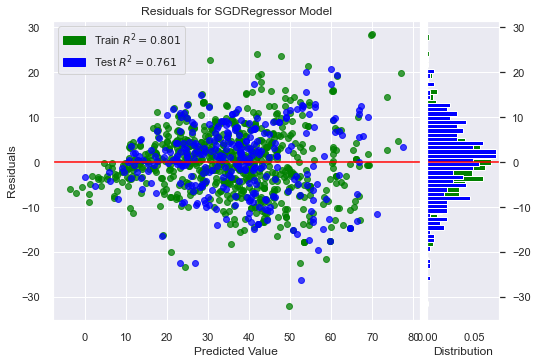

Train Accuracy : 0.8012145241757825
Test Accuracy : 0.7612662072823427
Mean squared error: 62.57
Coefficient of determination: 0.69


In [92]:
## The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis
## Regression using SGDRegressor

regressor = SGDRegressor()
regressor.fit(X_train, y_train)

visualizer = ResidualsPlot(regressor, train_color='green', test_color='blue', line_color='red', hist='density')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

prediction = regressor.predict(X_test)
print('Train Accuracy : {}'.format(regressor.score(X_train, y_train)))
print('Test Accuracy : {}'.format(regressor.score(X_test, y_test)))
print('Mean squared error: %.2f'%mean_squared_error(prediction, y_test))
print('Coefficient of determination: %.2f'%r2_score(prediction, y_test))

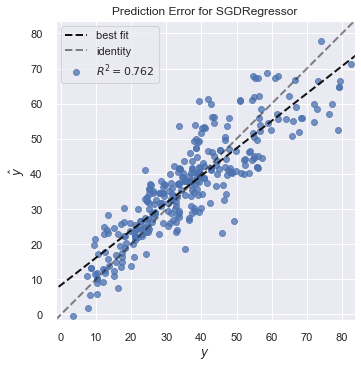

<AxesSubplot:title={'center':'Prediction Error for SGDRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [83]:
##The prediction error visualizer plots the actual targets from the dataset against the predicted values generated by our model(s)

from yellowbrick.regressor import PredictionError

regressor = SGDRegressor()
regressor.fit(X_train, y_train)

visualizer = PredictionError(regressor)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [32]:
Accuracy_df = pd.concat([pd.Series(y_test, name='Actual_Values'),
                         pd.Series(prediction, name='Predicted_Values')],axis=1)
Accuracy_df

,Actual_Values,Predicted_Values
0,21.91,22.195275
1,19.93,13.758303
2,36.44,27.257710
3,11.96,13.225781
4,39.84,30.241053
...,...,...
304,37.27,43.772419
305,52.43,44.252978
306,47.40,39.769004
307,44.09,42.872711


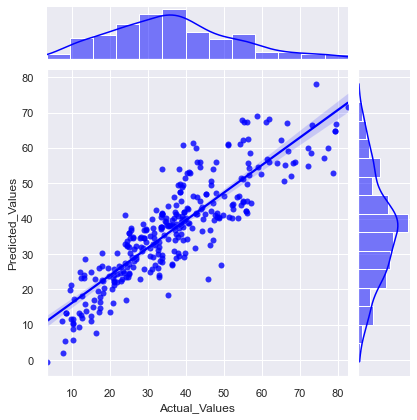

In [33]:
sns.set_theme(style="darkgrid")
sns.jointplot(x='Actual_Values',y='Predicted_Values',data=Accuracy_df, kind='reg', truncate=True, color='blue')

## Ensemble method for regression:

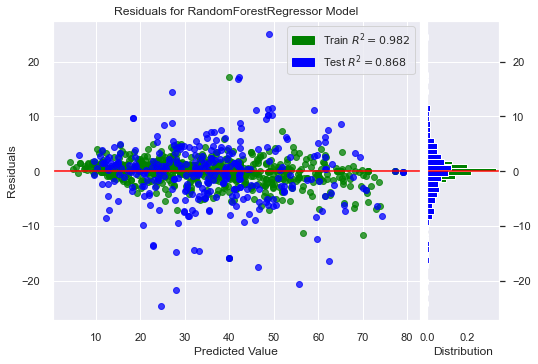

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
rfregressor = RandomForestRegressor(n_estimators=100, random_state=0)
rfregressor.fit(X_train, y_train)

visualizer = ResidualsPlot(rfregressor, train_color='green', test_color='blue', line_color='red', hist='density')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

print()

In [57]:
predictionrf = rfregressor.predict(X_test)

print('Train Accuracy : {}'.format(rfregressor.score(X_train, y_train)))
print('Test Accuracy : {}'.format(rfregressor.score(X_test, y_test)))
print('Mean squared error: %.2f'%mean_squared_error(predictionrf, y_test))
print('Coefficient of determination: %.2f'%r2_score(predictionrf, y_test))

Train Accuracy : 0.9824706702705116
Test Accuracy : 0.8683302660900885
Mean squared error: 34.51
Coefficient of determination: 0.85


In [58]:
Accuracy_df_rf = pd.concat([pd.Series(y_test, name='Actual_Values'),pd.Series(predictionrf, name='Predicted_Values')],axis=1)
Accuracy_df_rf

,Actual_Values,Predicted_Values
0,21.91,22.62410
1,19.93,12.82380
2,36.44,22.90950
3,11.96,12.59000
4,39.84,32.26680
...,...,...
304,37.27,40.59745
305,52.43,46.72190
306,47.40,44.81320
307,44.09,48.51800


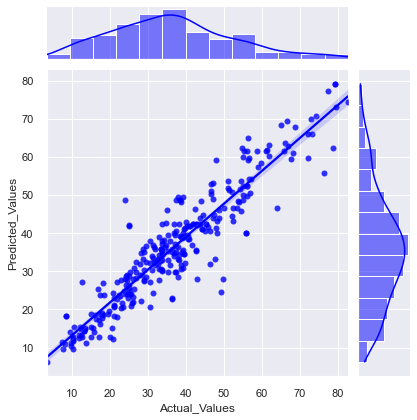

In [59]:
sns.set_theme(style="darkgrid")
sns.jointplot(x='Actual_Values',y='Predicted_Values',data=Accuracy_df_rf, kind='reg', truncate=True, color='blue')

## Summary:

* we have created a regression model with RandomForestRegressor and obtained a test accuracy 82.97% with Mean squared error 44.64 .
* next we will try do huperparameter tunning for Random Forest Regressor.

## Pipelines Perform Hyperparameter Tuning:

In [81]:
rf = RandomForestRegressor(random_state=42)
print(sg.get_params())

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [82]:
pipe = make_pipeline(RandomForestRegressor())
(sorted(pipe.get_params().keys()))

['memory',
 'randomforestregressor',
 'randomforestregressor__bootstrap',
 'randomforestregressor__ccp_alpha',
 'randomforestregressor__criterion',
 'randomforestregressor__max_depth',
 'randomforestregressor__max_features',
 'randomforestregressor__max_leaf_nodes',
 'randomforestregressor__max_samples',
 'randomforestregressor__min_impurity_decrease',
 'randomforestregressor__min_impurity_split',
 'randomforestregressor__min_samples_leaf',
 'randomforestregressor__min_samples_split',
 'randomforestregressor__min_weight_fraction_leaf',
 'randomforestregressor__n_estimators',
 'randomforestregressor__n_jobs',
 'randomforestregressor__oob_score',
 'randomforestregressor__random_state',
 'randomforestregressor__verbose',
 'randomforestregressor__warm_start',
 'steps',
 'verbose']

## Hyperparameter Tunning with RandomSearchCV

In [60]:
####### For RandomForestRegressor #######

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

##number of features to consider at every split
max_features = ['auto','sqrt']

## maximum number of leavels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)

## minimum number of samples required to split a node
min_samples_split = [2,5,10]

##minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,4]

##method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
best_model = rf_random.fit(X_train, y_train)


print("The Mean Accuracy of the model is : {accuracy} and mse : {mse_value}".format(accuracy  = best_model.score(X_test, y_test),
                                                                                    mse_value = mean_squared_error(best_model.predict(X_test), y_test)))
print("Estimator for the model : {}".format(best_model.best_estimator_))
print("Parameters for the model : {}".format(best_model.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The Mean Accuracy of the model is : 0.8728206657767941 and mse : 33.33461906563563
Estimator for the model : RandomForestRegressor(max_depth=100, n_estimators=800)
Parameters for the model : {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [63]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

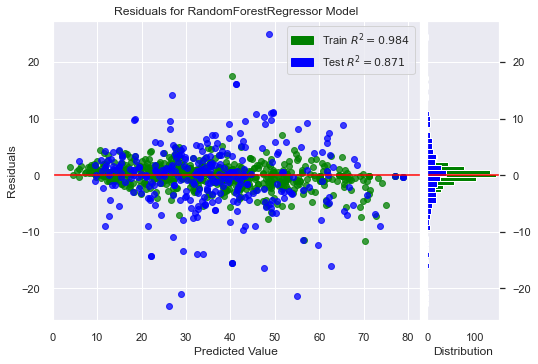

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [95]:
rfregressor_hyp = RandomForestRegressor(n_estimators = 400,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             max_features = 'auto',
                             max_depth = 100,
                             bootstrap = True)

visualizer = ResidualsPlot(rfregressor_hyp,train_color='green', test_color='blue', line_color='red')
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.show()

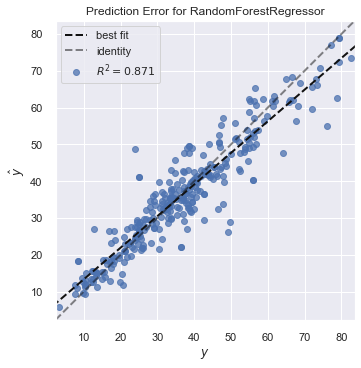

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [96]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(rfregressor_hyp)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Summary:
* we have tunned hyper parameters with randomsearchCV obtained accuracy 87% and mse 33.33 .
* Next, we will try to apply genetic algorithm for RandomForestRegressor using TPOTRegressor and will we are able to increase the accuracy or not.

## Hyperparameter Tunning with TPOTRegressor using Genetic Algorithm:


In [66]:
## number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

##number of features to consider at every split
max_features = ["auto","sqrt","log2"]

## maximum number of leavels in tree
max_depth = [int(x) for x in np.linspace(10,1000, 10)]
max_depth.append(None)

## minimum number of samples required to split a node
min_samples_split = [2,5,10,15]

##minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,4,6,8,10]

##method of selecting samples for training each tree
bootstrap = [True, False]

## measure the quality of a split
criterion = ["mse","mae"]

param =   {        
               "n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth": max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "bootstrap" : bootstrap,
               "criterion" : criterion
         }

print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']}


In [67]:
from tpot import TPOTRegressor

D:\Application\python\global\python395\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [76]:
TptRegressor = TPOTRegressor(generations=5, population_size=24, offspring_size=12,
                            verbosity=2, early_stop=12, config_dict={"sklearn.ensemble.RandomForestRegressor" : param},
                            cv=4, scoring = 'r2')

TptRegressor.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8922882789836277

Generation 2 - Current best internal CV score: 0.8922882789836277

Generation 3 - Current best internal CV score: 0.8922882789836277

Generation 4 - Current best internal CV score: 0.8922882789836277

Generation 5 - Current best internal CV score: 0.8922882789836277

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, bootstrap=True, criterion=mse, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=1600), bootstrap=True, criterion=mse, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1800)


TPOTRegressor(config_dict={'sklearn.ensemble.RandomForestRegressor': {'bootstrap': [True,
                                                                                    False],
                                                                      'criterion': ['mse',
                                                                                    'mae'],
                                                                      'max_depth': [10,
                                                                                    120,
                                                                                    230,
                                                                                    340,
                                                                                    450,
                                                                                    560,
                                                                                    670,
             

In [77]:
prediction = TptRegressor.predict(X_test)
accuracy = TptRegressor.score(X_test, y_test)
print("The Mean Accuracy of the model is : {accuracy} and mse : {mse_value}".format(accuracy  = TptRegressor.score(X_test, y_test),
                                                                                    mse_value = mean_squared_error(TptRegressor.predict(X_test), y_test)))

The Mean Accuracy of the model is : 0.8860346735524212 and mse : 29.87113249982449


In [78]:
TptRegressor.export('tpot_strength_pipeline.py')

## Summary:

* we are trying to find best hyperparameter for RandomForestRegressor and we are able to increase the model accuracy from 87% to 88.60 % or have reduced mse value from 33.33 to 29.87 .